<a href="https://colab.research.google.com/github/pammelaAC/MachineLearningPractitioner/blob/main/DeteccaoYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
rm -rf darknet

In [27]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 10.72 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.


In [28]:
ls

3rdparty/       darknet/                Dockerfile.cpu          Makefile        scripts/
backup/         DarknetConfig.cmake.in  Dockerfile.gpu          net_cam_v3.sh*  src/
build/          darknet_images.py       image_yolov3.sh*        net_cam_v4.sh*  vcpkg.json
build.ps1*      darknet.py              image_yolov4.sh*        obj/            video_yolov3.sh*
cfg/            darknet_video.py        include/                package.xml     video_yolov4.sh*
cmake/          data/                   json_mjpeg_streams.sh*  README.md       yolov4.weights
CMakeLists.txt  docker-compose.yml      LICENSE                 results/        yolov4.weights.1


In [29]:
cd darknet

/content/darknet/darknet


In [7]:
ls

3rdparty/       DarknetConfig.cmake.in  Dockerfile.cpu          LICENSE         scripts/
build/          darknet_images.py       Dockerfile.gpu          Makefile        src/
build.ps1*      darknet.py              image_yolov3.sh*        net_cam_v3.sh*  vcpkg.json
cfg/            darknet_video.py        image_yolov4.sh*        net_cam_v4.sh*  video_yolov3.sh*
cmake/          data/                   include/                package.xml     video_yolov4.sh*
CMakeLists.txt  docker-compose.yml      json_mjpeg_streams.sh*  README.md


In [30]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [32]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2025-02-08 14:16:55--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  34.4MB/s    in 8.8s    

2025-02-08 14:17:05 (26.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [45]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

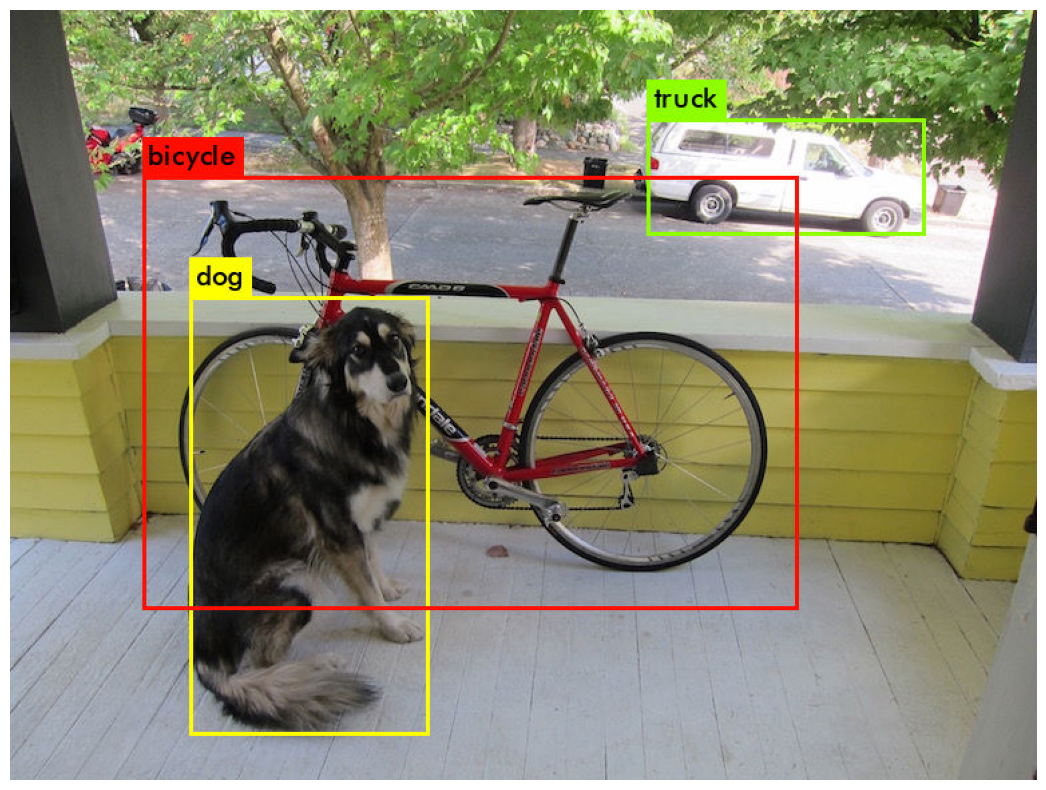

In [46]:
import cv2
import matplotlib.pyplot as plt
def mostrar (frame):
  imagem = cv2.imread(frame)
  fig = plt.gcf() #função que chama uma figura do matplotlib
  fig.set_size_inches(18,10) #tamanho que vai ser gerada a saída
  plt.axis('off') #retira do formato padrão do matplotlib (como um plano cartesiano)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
  plt.show()

mostrar('predictions.jpg')